# Logistic Regression

#### Imports

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from matplotlib.colors import ListedColormap

END = "\n-------------------------\n"

#### Standard steps

In [85]:
# Code import
df = pd.read_csv('Social_Network_Ads.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [86]:
# Train test split
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.25, random_state=0)
print(x_train[0:5], END, x_test[0:5])

[[    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]] 
-------------------------
 [[   30 87000]
 [   38 50000]
 [   35 75000]
 [   30 79000]
 [   35 50000]]


#### Feature Scaling

In [87]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[0:5], END, x_test[0:5], END, y_train[0:5])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]] 
-------------------------
 [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]] 
-------------------------
 [0 1 0 1 1]


#### Training the model

In [88]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
print()

#### Predicting a new result

In [89]:
# Predict whether a person who's 30 years old earning 87k buys or not
prediction = classifier.predict(sc.transform([[30, 87000]])) # The classifier only works properly when the test observation is in the same scale as the training observations.
print(f"Status for 30 year old earning 87k: {prediction[0]}")
print(f"Correct answer: {y_test[0]}")

Status for 30 year old earning 87k: 0
Correct answer: 0


#### Predicting test results

In [90]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)[0:5])


[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


#### Confusion Matrix

In [91]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


#### Other metrics

Accuracy: 0.89
Precision: 0.8888888888888888
Recall: 0.75
F1 Score: 0.8135593220338982
ROC AUC: 0.8529411764705883


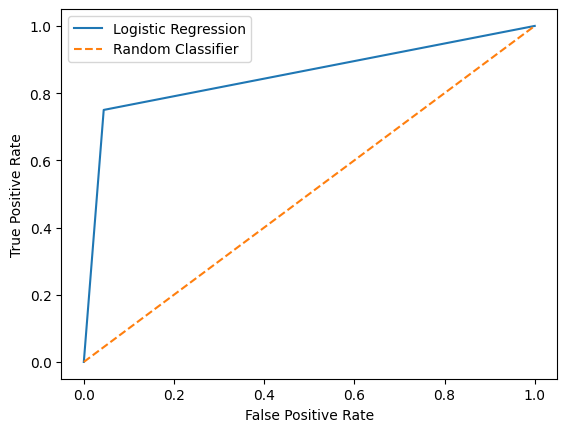

In [92]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Precision
print(f"Precision: {precision_score(y_test, y_pred)}")

# Recall
print(f"Recall: {recall_score(y_test, y_pred)}")

# F1 Score
print(f"F1 Score: {f1_score(y_test, y_pred)}")

# ROC AUC
print(f"ROC AUC: {roc_auc_score(y_test, y_pred)}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], label='Random Classifier', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Visualising the results (Both training and test)

C:\Users\hifia\AppData\Local\Temp\ipykernel_22084\389258563.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


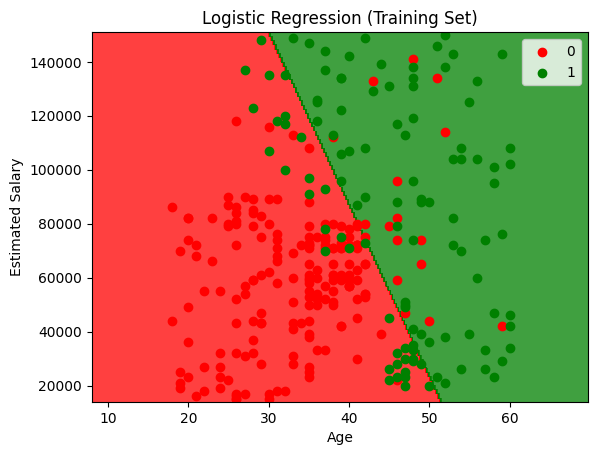

C:\Users\hifia\AppData\Local\Temp\ipykernel_22084\389258563.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)


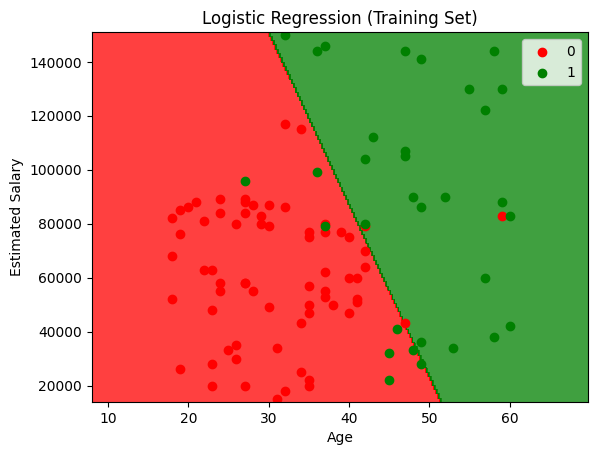

In [96]:
# Training set visualisation
x_set, y_set = sc.inverse_transform(x_train), y_train

X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25), 
                     np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Test set visualisation
x_set, y_set = sc.inverse_transform(x_test), y_test

X1, X2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25), 
                     np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha = 0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1], c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()